# Budget Analysis

---

## Environment Setup

In [1]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
# Set environment variables from the .env file
load_dotenv("c:/Users/Sungwon Kim/Fintech/.env")

True

In [4]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')


In [6]:
# Set the institution id
INSITUTION_ID = "ins_109508"

### 2. Generate a public token

In [7]:
# Create the public token
create_tkn_response = client.Sandbox.public_token.create(INSITUTION_ID, ['transactions', 'income', 'assets'])

# Print the public token
print(create_tkn_response)

{'public_token': 'public-sandbox-56f68837-0647-46e0-8f89-5f940f0627ea', 'request_id': 'Lu4VFo5ynLmHY85'}


### 3. Exchange the public token for an access token

In [8]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Print the access toke
print(exchange_response)

{'access_token': 'access-sandbox-7843e6ab-7efd-4370-b85c-8496a3a137ed', 'item_id': 'EGWQvyzrqbfAXXax8N5gUlDk3xD1DJfXeyz6j', 'request_id': '2aL4ur0dzPFLuAQ'}


In [9]:
# Store the access token in a Python variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [10]:
# Retrieve accounts
account = client.Accounts.get(access_token)
# Print accounts
pretty_print_response(account)

{
    "accounts": [
        {
            "account_id": "1dBRmkewo5UL11zewXqgu6k47PWV3xF5GAwGz",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "LvwkoBRbd6hBVVGnEM5gfen7zmK6r1CPyVJyx",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [21]:
# Set the start and end date 90 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Retrieve the transactions for the last 90 days
transaction_response = client.Transactions.get(access_token, start_date, end_date)

# Print the transactions
pretty_print_response(transaction_response)

{
    "accounts": [
        {
            "account_id": "1dBRmkewo5UL11zewXqgu6k47PWV3xF5GAwGz",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "LvwkoBRbd6hBVVGnEM5gfen7zmK6r1CPyVJyx",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

### 2. Print the categories for each transaction

In [22]:
len(transaction_response['transactions'])

48

In [23]:
# Create a for-loop to print the categories for each transaction
categories_list = []
for i in range(len(transaction_response['transactions'])): 
         categories = transaction_response['transactions'][i]['category']
         categories_list.append(categories)
print(categories_list)

[['Travel', 'Airlines and Aviation Services'], ['Travel', 'Taxi'], ['Food and Drink', 'Restaurants'], ['Payment'], ['Food and Drink', 'Restaurants', 'Fast Food'], ['Shops', 'Sporting Goods'], ['Payment', 'Credit Card'], ['Travel', 'Taxi'], ['Transfer', 'Debit'], ['Transfer', 'Deposit'], ['Recreation', 'Gyms and Fitness Centers'], ['Travel', 'Airlines and Aviation Services'], ['Food and Drink', 'Restaurants', 'Fast Food'], ['Food and Drink', 'Restaurants', 'Coffee Shop'], ['Food and Drink', 'Restaurants'], ['Transfer', 'Credit'], ['Travel', 'Airlines and Aviation Services'], ['Travel', 'Taxi'], ['Food and Drink', 'Restaurants'], ['Payment'], ['Food and Drink', 'Restaurants', 'Fast Food'], ['Shops', 'Sporting Goods'], ['Payment', 'Credit Card'], ['Travel', 'Taxi'], ['Transfer', 'Debit'], ['Transfer', 'Deposit'], ['Recreation', 'Gyms and Fitness Centers'], ['Travel', 'Airlines and Aviation Services'], ['Food and Drink', 'Restaurants', 'Fast Food'], ['Food and Drink', 'Restaurants', 'Coffe

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [24]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
columns=['date', 'name', 'amount', 'category']
df = pd.DataFrame(columns=columns)

Define a function that returns each list of columns retreived from the transactions

In [25]:
def retrieve_transactions(column):
    temp_list = []
    for i in range(len(transaction_response['transactions'])): 
         if column != 'category':
                data = transaction_response['transactions'][i][column]
                temp_list.append(data)
         else:
                data = transaction_response['transactions'][i][column][0] # for 'category' should use the first label in the list, we need to do it separately.
                temp_list.append(data) 
    return temp_list
print(retrieve_transactions('category'))

['Travel', 'Travel', 'Food and Drink', 'Payment', 'Food and Drink', 'Shops', 'Payment', 'Travel', 'Transfer', 'Transfer', 'Recreation', 'Travel', 'Food and Drink', 'Food and Drink', 'Food and Drink', 'Transfer', 'Travel', 'Travel', 'Food and Drink', 'Payment', 'Food and Drink', 'Shops', 'Payment', 'Travel', 'Transfer', 'Transfer', 'Recreation', 'Travel', 'Food and Drink', 'Food and Drink', 'Food and Drink', 'Transfer', 'Travel', 'Travel', 'Food and Drink', 'Payment', 'Food and Drink', 'Shops', 'Payment', 'Travel', 'Transfer', 'Transfer', 'Recreation', 'Travel', 'Food and Drink', 'Food and Drink', 'Food and Drink', 'Transfer']


In [26]:
# Populate the transactions DataFrame with the transactions data

for i in columns:    
    df[i] = retrieve_transactions(i)

# Display sample data from the DataFrame    
df.head()

,date,name,amount,category
0,2020-05-30,United Airlines,500.00,Travel
1,2020-05-28,Uber,6.33,Travel
2,2020-05-25,Tectra Inc,500.00,Food and Drink
3,2020-05-24,AUTOMATIC PAYMENT - THANK,2078.50,Payment
4,2020-05-24,KFC,500.00,Food and Drink


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [27]:
# Display data types
df.dtypes

date         object
name         object
amount      float64
category     object
dtype: object

In [28]:
# Make any required data type transformation
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.dtypes

date        datetime64[ns]
name                object
amount             float64
category            object
dtype: object

In [29]:
# Set the date column as index
df.set_index('date', inplace=True)
# Display sample data
df

,name,amount,category
date,,,
2020-05-30,United Airlines,500.00,Travel
2020-05-28,Uber,6.33,Travel
2020-05-25,Tectra Inc,500.00,Food and Drink
2020-05-24,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-05-24,KFC,500.00,Food and Drink
2020-05-24,Madison Bicycle Shop,500.00,Shops
2020-05-15,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
2020-05-15,Uber,5.40,Travel
2020-05-14,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [30]:
# Fetch de income data
income = client.Income.get(access_token)

# Print the income data
pretty_print_response(income)

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 690,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "heBVUVIM7hU4jIg"
}


In [31]:
# Determine the previous year's gross income and print the results
previous_year_gross_income =  income['income']["last_year_income_before_tax"]
previous_year_gross_income

7285

In [32]:
# Determine the current monthly income and print the results
monthly_income = income['income']['income_streams'][0]['monthly_income']

# Print the result
monthly_income

500

In [33]:
# Determine the projected yearly income and print the results
projected_yearly_income = income['income']['projected_yearly_income']
projected_yearly_income

6085

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [34]:
# Compute the total expenses per category
total_expenses = df.groupby(['category']).sum()

# Display the expenses per catefory
total_expenses

,amount
category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


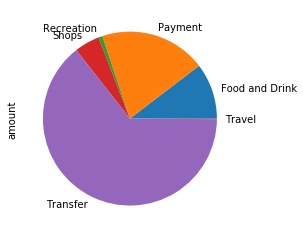

In [35]:
# Create a spending categories pie chart.
total_expenses.plot.pie(y='amount', legend=None)

### Calculate the expenses per month

In [36]:
# Create a DataFrame with the total expenses
expense_per_month = df.groupby([df.index.year, df.index.month])['category','amount'].sum()

# Display sample data
expense_per_month

amount
date date          
2020 3     10645.24
     4     10645.24
     5     10645.24

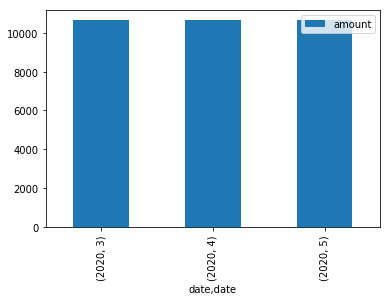

In [43]:
# Create a spending per month bar chart
expense_per_month.plot(kind='bar')